 # Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Case Study 

In this project, I'll be delving into transactional data from an online retail store, which includes comprehensive information about customer purchases. From product details to quantities, prices, and timestamps, this dataset offers a rich source of insights waiting to be uncovered.
My objective is to conduct exploratory data analysis to reveal sales trends, customer behavior patterns, and popular products within the store's operations. By scrutinizing the data for patterns, anomalies, and correlations, I'll be equipped to make informed decisions and recommendations aimed at optimizing operations and enhancing customer satisfaction.
Through a combination of visualizations and statistical analyses, I'll unearth vital trends such as peak sales months, top-selling products, and the most valuable customers to the store. Ultimately, the goal of this project is to furnish actionable insights that will inform strategic business decisions and elevate the store's performance in the competitive online retail landscape.

## DataSet

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named <span style="background-color:  #D3D3D3;">Online retail.xlsx</span> . This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://github.com/Toghrul-DataJedi/Online-Retail-Exploratory-Data-Analysis-with-Python.git)
.

The dataset contains the following columns:

-InvoiceNo: Invoice number of the transaction

-StockCode: Unique code of the product

-Description: Description of the product

-Quantity: Quantity of the product in the transaction

-InvoiceDate: Date and time of the transaction

-UnitPrice: Unit price of the product

-CustomerID: Unique identifier of the customer

-Country: Country where the transaction occurred

## 1. Importing the required libraries for EDA and Loading of the Data

In [112]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt1
sns.set(color_codes=True)

In [113]:
df=pd.read_excel(r"C:\Users\tobim\OneDrive\Masaüstü\Projects\Online Retail.xlsx")

In [114]:
df.head(5)       # To display the top 5 rows 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [115]:
df.tail(5)  # To display the botton 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [116]:
df.dtypes    # Checking the types of data

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

This is often a handy thing to do because a huge data set as in this case contains more than 5,000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set.

In [117]:
df.shape  

(541909, 8)

In [118]:
##Detecting Duplicated rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)         

number of duplicate rows:  (5268, 8)


In [119]:
df=df.drop_duplicates()
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [120]:
df.count()

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

In [121]:
print(df.isnull().sum())   #Detecting the null values.

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


CustomerID Column:
With 135,037 null values, it indicates that a large portion of transactions does not have associated customer IDs.

Description Column:
With 1454 null values, it suggests that there are some transactions where the description of the purchased item is missing.

In [122]:
df=df.dropna() # Dropping the missing values
df.count()

InvoiceNo      401604
StockCode      401604
Description    401604
Quantity       401604
InvoiceDate    401604
UnitPrice      401604
CustomerID     401604
Country        401604
dtype: int64

In [123]:
print(df.isnull().sum())  # After dropping the values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


<Axes: xlabel='UnitPrice'>

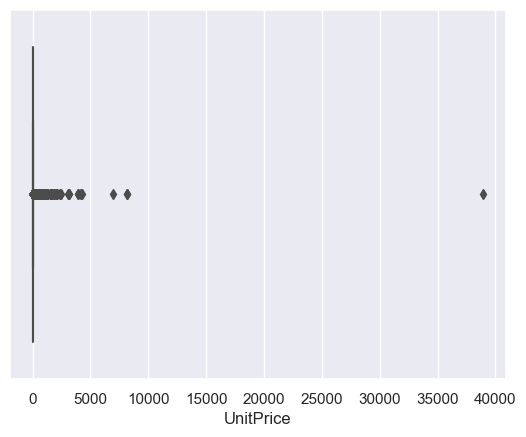

In [124]:
 sns.boxplot(x=df['UnitPrice'])   #Checking the outliers for UNIT PRICE

In [125]:

empty_values = df == ''    # For empty string values


In [126]:

empty_counts = empty_values.sum()

In [127]:
print(empty_counts)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [128]:
summary=df.describe() #Summarization
print(summary)

            Quantity      UnitPrice     CustomerID
count  401604.000000  401604.000000  401604.000000
mean       12.183273       3.474064   15281.160818
std       250.283037      69.764035    1714.006089
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13939.000000
50%         5.000000       1.950000   15145.000000
75%        12.000000       3.750000   16784.000000
max     80995.000000   38970.000000   18287.000000


# Central tendency - Mean , Median and Mode

In [129]:
mean_unitprice=df["UnitPrice"].mean()
print(mean_unitprice)
mean_quantity=df["Quantity"].mean()
print(mean_quantity)

3.4740636398043865
12.183272576966365


In [130]:
#Calculate Median for Quantity column
median_Quantity = df["Quantity"].median()
print(median_Quantity)
#Calculate Median for UnitPrice column
median_UnitPrice = df["UnitPrice"].median()
print(median_UnitPrice)

5.0
1.95


In [131]:
#Calculate Mode for Quantity column
mode_quantity=df["Quantity"].mode().iloc[0]
print(mode_quantity)
#Calculate Mode for UnitPrice column
mode_UnitPrice = df["UnitPrice"].mode().iloc[0]
print(mode_UnitPrice)

1
1.25


# Dispersion - Quantity , UnitPrice

In [132]:
# Calculate range for Quantity columns
range_Quantity = df["Quantity"].max() - df["Quantity"].min()
print(range_Quantity)
# Calculate range for UnitPrice columns
range_UnitPrice = df["UnitPrice"].max() - df["UnitPrice"].min()
print(range_UnitPrice)

161990
38970.0


In [133]:
# Calculate variance for Quantity columns
variance_values_Quantity = df["Quantity"].var()
print(variance_values_Quantity)
# Calculate variance for UnitPrice columns
variance_values_UnitPrice = df["UnitPrice"].var()
print(variance_values_UnitPrice)

62641.59868224938
4867.020588428194


In [134]:
# Calculate standard deviation for Quantity columns
std_deviation_Quantity = df["Quantity"].std()
print(std_deviation_Quantity)
# Calculate standard deviation for UnitPrice columns
std_deviation_UnitPrice = df["UnitPrice"].std()
print(std_deviation_UnitPrice)

250.28303714444849
69.76403506412308


In [135]:
# Calculate quartiles for Quantity columns
q1 = df["Quantity"].quantile(0.25)
q2 = df["Quantity"].quantile(0.50)  # same as median
q3 = df["Quantity"].quantile(0.75)

# Calculate interquartile range (IQR)
iqr = q3 - q1
print(iqr)

10.0


In [136]:
# Calculate quartiles for UnitPrice columns
q1 = df["UnitPrice"].quantile(0.25)
q2 = df["UnitPrice"].quantile(0.50)  # same as median
q3 = df["UnitPrice"].quantile(0.75)

# Calculate interquartile range (IQR)
iqr = q3 - q1
print(iqr)

2.5


In [137]:
# Calculate total sales for each transaction
df['TotalSales'] = df['UnitPrice'] * df['Quantity']

In [138]:
 #Group total sales by date (e.g., by month)
total_sales_by_date = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalSales'].sum()

## Visualisation Part



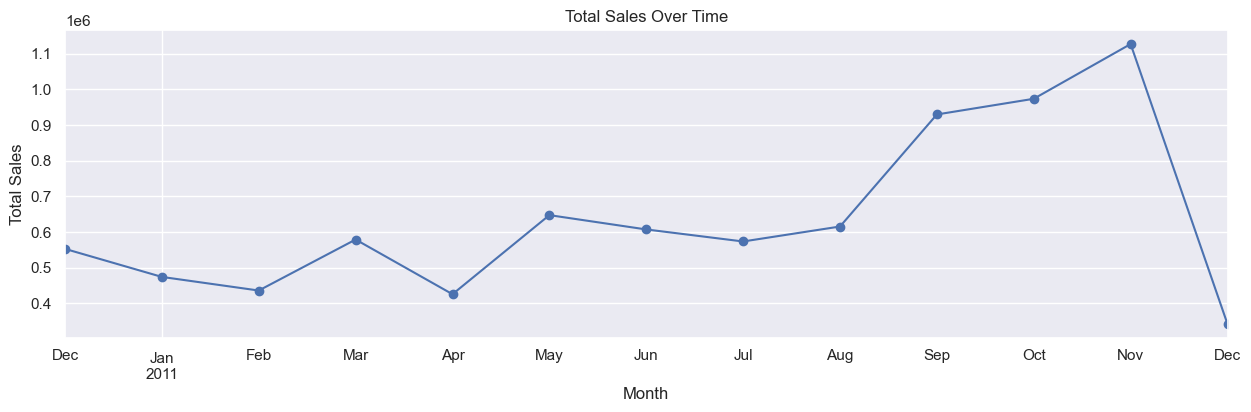

In [139]:
# Plot total sales over time
plt1.figure(figsize=(15, 4))
total_sales_by_date.plot(kind='line', marker='o')
plt1.title('Total Sales Over Time')
plt1.xlabel('Month')
plt1.ylabel('Total Sales')
plt1.grid(True)
plt1.show()

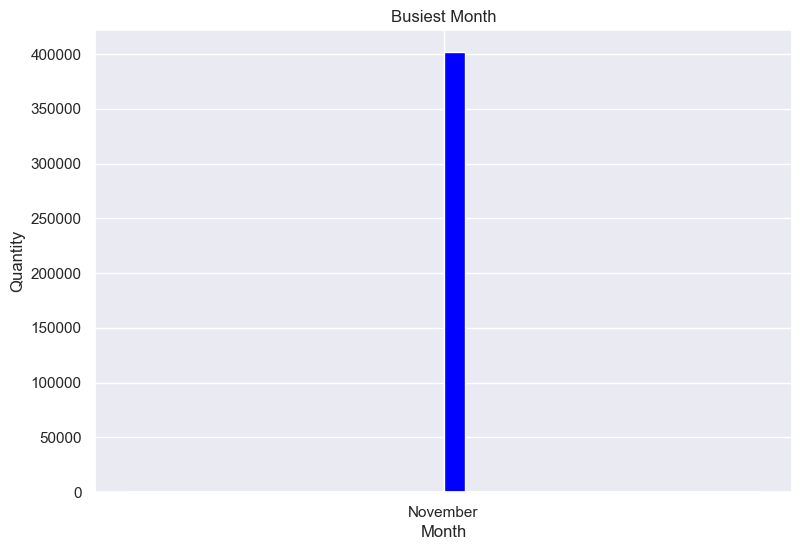

In [140]:
#extract month and days
df['DaysofWeek']=df['InvoiceDate'].dt.dayofweek
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.strftime('%B')
monthly_sales=df.groupby('Month')['Quantity'].sum()
daily_sales=df.groupby('DaysofWeek')['Quantity'].sum()

# Identify the busiest month
df['busiest_month'] = monthly_sales.idxmax()


##plot
plt1.figure(figsize=(9, 6))
plt1.hist(df['busiest_month'], bins=30,color='blue')
plt1.xlabel('Month')
plt1.ylabel('Quantity')
plt1.title('Busiest Month')
plt1.show()

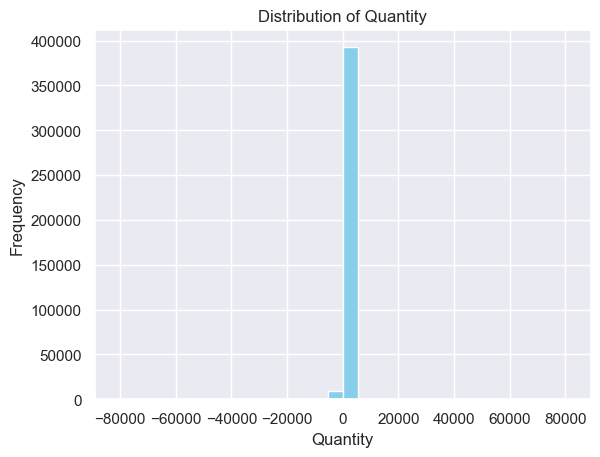

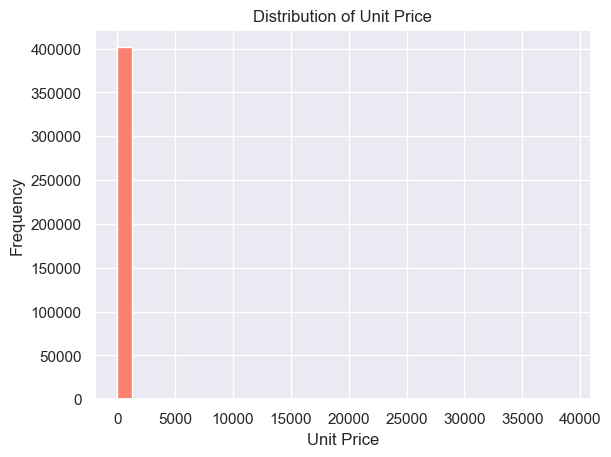

In [141]:
# Histogram for Quantity
plt1.hist(df['Quantity'], bins=30, color='skyblue')
plt1.xlabel('Quantity')
plt1.ylabel('Frequency')
plt1.title('Distribution of Quantity')
plt1.show()

plt1.hist(df['UnitPrice'],bins=30,color='salmon')
plt1.xlabel('Unit Price')
plt1.ylabel('Frequency')
plt1.title('Distribution of Unit Price')
plt1.show()

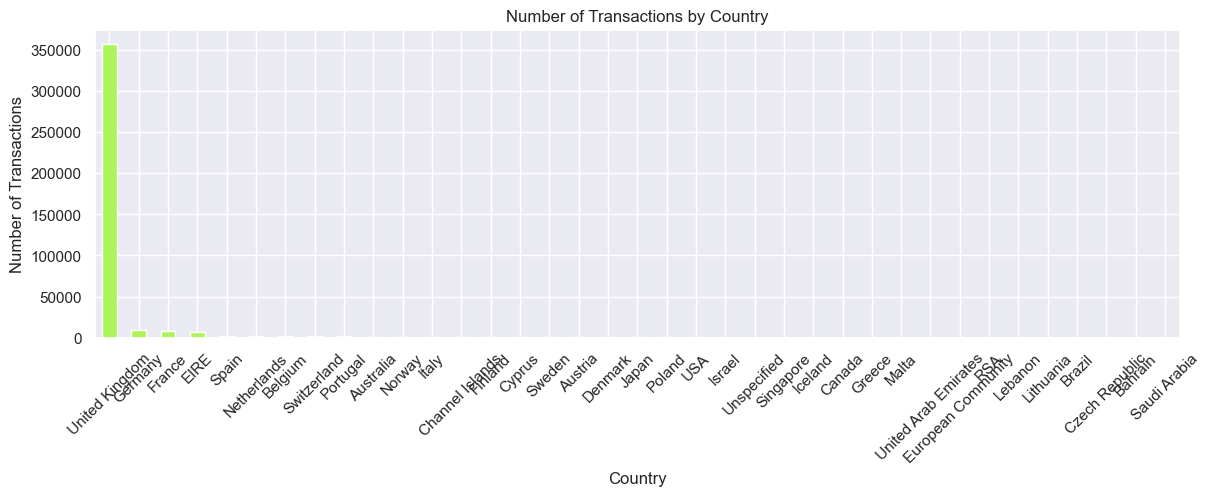

In [142]:
# Bar plot for Country
country_counts = df['Country'].value_counts()
plt1.figure(figsize=(14, 4))
country_counts.plot(kind='bar', color='#aef359')
plt1.xlabel('Country')
plt1.ylabel('Number of Transactions')
plt1.title('Number of Transactions by Country')
plt1.xticks(rotation=45)
plt1.show()


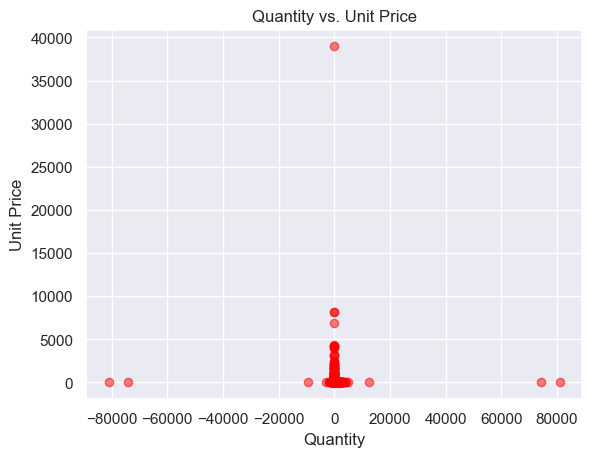

In [143]:
# Scatter plot for Quantity vs. UnitPrice
plt1.scatter(df['Quantity'], df['UnitPrice'], color='red', alpha=0.5)
plt1.xlabel('Quantity')
plt1.ylabel('Unit Price')
plt1.title('Quantity vs. Unit Price')
plt1.show()

In [144]:

# Find the top selling products 
top_selling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
top_selling_product = top_selling_products.idxmax()

# Print the top-selling products
print("Top-Selling Products:")
print(top_selling_products)
print(f"\nTop Product : {top_selling_product}")
print()

Top-Selling Products:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      53119
JUMBO BAG RED RETROSPOT                44963
ASSORTED COLOUR BIRD ORNAMENT          35215
WHITE HANGING HEART T-LIGHT HOLDER     34128
PACK OF 72 RETROSPOT CAKE CASES        33386
                                       ...  
PINK POODLE HANGING DECORATION           -12
CRUK Commission                          -16
ASSORTED TUTTI FRUTTI ROUND BOX          -24
Discount                               -1194
ROTATING SILVER ANGELS T-LIGHT HLDR    -1475
Name: Quantity, Length: 3896, dtype: int64

Top Product : WORLD WAR 2 GLIDERS ASSTD DESIGNS



In [145]:
# Find the top selling countries
top_selling_countries = df.groupby("Description")["Country"].sum().sort_values(ascending=False)
# Print the top-selling- countries
print("Top-Selling Countries : ")
print(top_selling_countries.head(3))

Top-Selling Countries : 
Description
HOT WATER BOTTLE KEEP CALM       UnspecifiedUnited KingdomUnited KingdomUnited ...
PINK BITTY LIGHT CHAIN           UnspecifiedUnited KingdomUnited KingdomUnited ...
CROCHET WHITE RABBIT KEYRING               United KingdomUnited KingdomUnspecified
Name: Country, dtype: object


In [146]:
print(">>>Conclusion<<<<<")
print("Using Python for Exploratory data analysis makes easy to find the  mean , median and modes using the pandas library..\nIt becomes very easy to visualize the data in different types of graphs such as in Histograms , Scatter plots and in Bar plots")
print("Standard Deviation and variations can also be performed as pandas library has enriched with built in functions for\ndata analysis.")
print(">>>>Summarize<<<<<")
print("Firstly we have checked for any missing values and removed the missing values.")
print("By analyzing the sales trends over time we have come to know about busiest month and busiest days of week which \nwas in months - November and in Days of the week it was 3 - Wednesday")

>>>Conclusion<<<<<
Using Python for Exploratory data analysis makes easy to find the  mean , median and modes using the pandas library..
It becomes very easy to visualize the data in different types of graphs such as in Histograms , Scatter plots and in Bar plots
Standard Deviation and variations can also be performed as pandas library has enriched with built in functions for
data analysis.
>>>>Summarize<<<<<
Firstly we have checked for any missing values and removed the missing values.
By analyzing the sales trends over time we have come to know about busiest month and busiest days of week which 
was in months - November and in Days of the week it was 3 - Wednesday
